In [1]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np
import gym

from scan_gym import envs
#imp.reload(envs)

#seed=42
#np.random.seed(seed)

import random

In [2]:
def plot_vol(vol):
    # for creating a responsive plot
    %matplotlib widget

    # importing required libraries
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt

    #x,y,z = np.where(vol[:64,:64,:128]==1)
    
    x,y,z = np.where(vol==1)

    # creating figure
    fig = plt.figure()
    ax = Axes3D(fig)

    #ax.set_xlim3d(0, 10)
    #ax.set_ylim3d(0, 10)
    #ax.set_zlim3d(0, 10)

    #ax.set_xlim3d(0, 140)
    #ax.set_ylim3d(0, 140)
    #ax.set_zlim3d(0, 140)

    # creating the plot
    ax.scatter(x, y, z, color='green',s=1)

    #x,y,z = np.where(spc.sc.values()==0)
    #plot_geeks = ax.scatter(x, y, z, color='red',s=1)

    # setting title and labels
    ax.set_title("3D plot")
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    ax.grid()
    
    #make  0 origin coincide in all axis
    ax.xaxis._axinfo['juggled'] = (0,0,0)
    ax.yaxis._axinfo['juggled'] = (1,1,1)
    ax.zaxis._axinfo['juggled'] = (2,2,2)
    
    ax.view_init(90, 0)

    # displaying the plot
    plt.show()

/vol/fob-vol6/mi13/pivillaa/.conda/envs/rl/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
models = ['206_2d','211_2d']
n_images = 15
continuous = False
scan_env = gym.make('ScannerEnv-v1', models_path='/vol/fob-vol6/mi13/pivillaa/uni/romi/scanner-gym_models', train_models=models,
                   n_images = n_images, continuous=continuous, gt_mode=True, cube_view='static')

/vol/fob-vol6/mi13/pivillaa/.conda/envs/rl/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


theta 77 phi 0


/vol/fob-vol6/mi13/pivillaa/.conda/envs/rl/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Canvas).__init__().
__init__() missing 1 required positional argument: 'figure'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)
/vol/fob-vol6/mi13/pivillaa/.conda/envs/rl/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


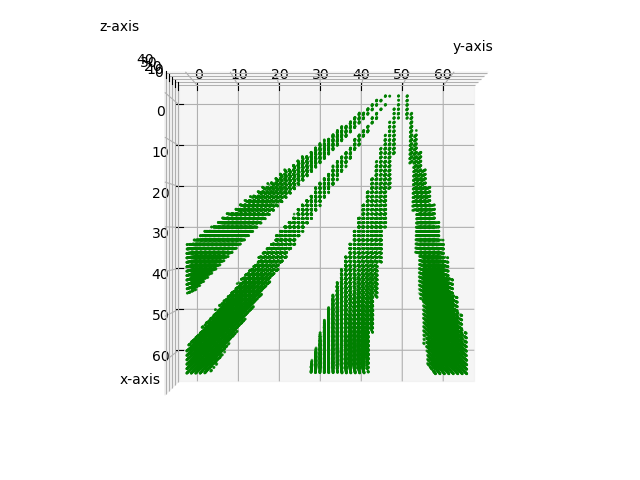

In [6]:
init_state = scan_env.reset()
print('theta', init_state[1][0], 'phi', init_state[1][1])
plot_vol(init_state[0])

step 2 theta 116 phi 0 done False reward 0.05506870817403381 similarity 0.27734948861807956


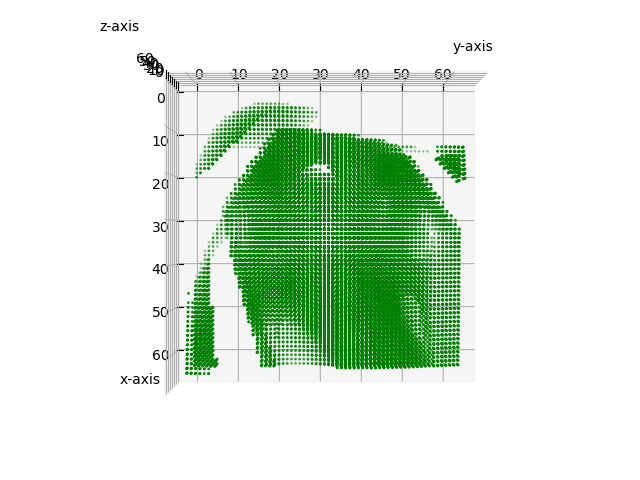

In [50]:
if continuous:
    #rnd [-1,1]
    action =2*np.random.rand(2)-1
    print(action)
    state, reward, done, _ = scan_env.step(action) 
else:    
    state, reward, done, _ = scan_env.step(np.random.randint(scan_env.nA))
    
print('step', scan_env.num_steps, 'theta', state[1][0], 'phi', state[1][1],
      'done', done,'reward', reward, 'similarity', scan_env.spc.gt_compare_solid())

if done:
    print('cumulative reward',scan_env.total_reward)
    scan_env.reset()
    
plot_vol(state[0])

In [51]:
%matplotlib inline
plt.imshow(state[0][:,:,2],cmap='gray', vmin = 0, vmax = 255)
plt.show()

ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>

array([0.52313996, 0.121021  ])